In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
reservations = pd.read_csv('Hotel_Reservations.csv')
reservations

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [30]:
def label_avg_price_per_room(price):
    if price <= 85:
        return 0
    elif price <= 115:
        return 1
    else:
        return 2

In [31]:
reservations['label_avg_price_per_room'] = reservations['avg_price_per_room'].apply(label_avg_price_per_room)

In [32]:
reservations.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
label_avg_price_per_room                0
dtype: int64

In [33]:
reservations.drop(columns=['Booking_ID','avg_price_per_room','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','booking_status'],axis=1, inplace=True)
reservations = reservations.replace(['Not Selected', 'Meal Plan 1','Meal Plan 2', 'Meal Plan 3'],[ 0, 1, 2, 3])
reservations = reservations.replace(['Offline', 'Online', 'Complementary','Corporate', 'Aviation'],[ 0, 1, 2, 3, 4])
reservations = reservations.replace(['Room_Type 1', 'Room_Type 2', 'Room_Type 3','Room_Type 4','Room_Type 5', 'Room_Type 6', 'Room_Type 7'], [ 0, 1, 2, 3, 4, 5, 6 ])
reservations = reservations.replace(['Not_Canceled','Canceled'],[0,1])
reservations

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_special_requests,label_avg_price_per_room
0,2,0,1,2,1,0,0,224,2017,10,2,0,0,0,0
1,2,0,2,3,0,0,0,5,2018,11,6,1,0,1,1
2,1,0,2,1,1,0,0,1,2018,2,28,1,0,0,0
3,2,0,0,2,1,0,0,211,2018,5,20,1,0,0,1
4,2,0,1,1,0,0,0,48,2018,4,11,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,3,85,2018,8,3,1,0,1,2
36271,2,0,1,3,1,0,0,228,2018,10,17,1,0,2,1
36272,2,0,2,6,1,0,0,148,2018,7,1,1,0,2,1
36273,2,0,0,3,0,0,0,63,2018,4,21,1,0,0,1


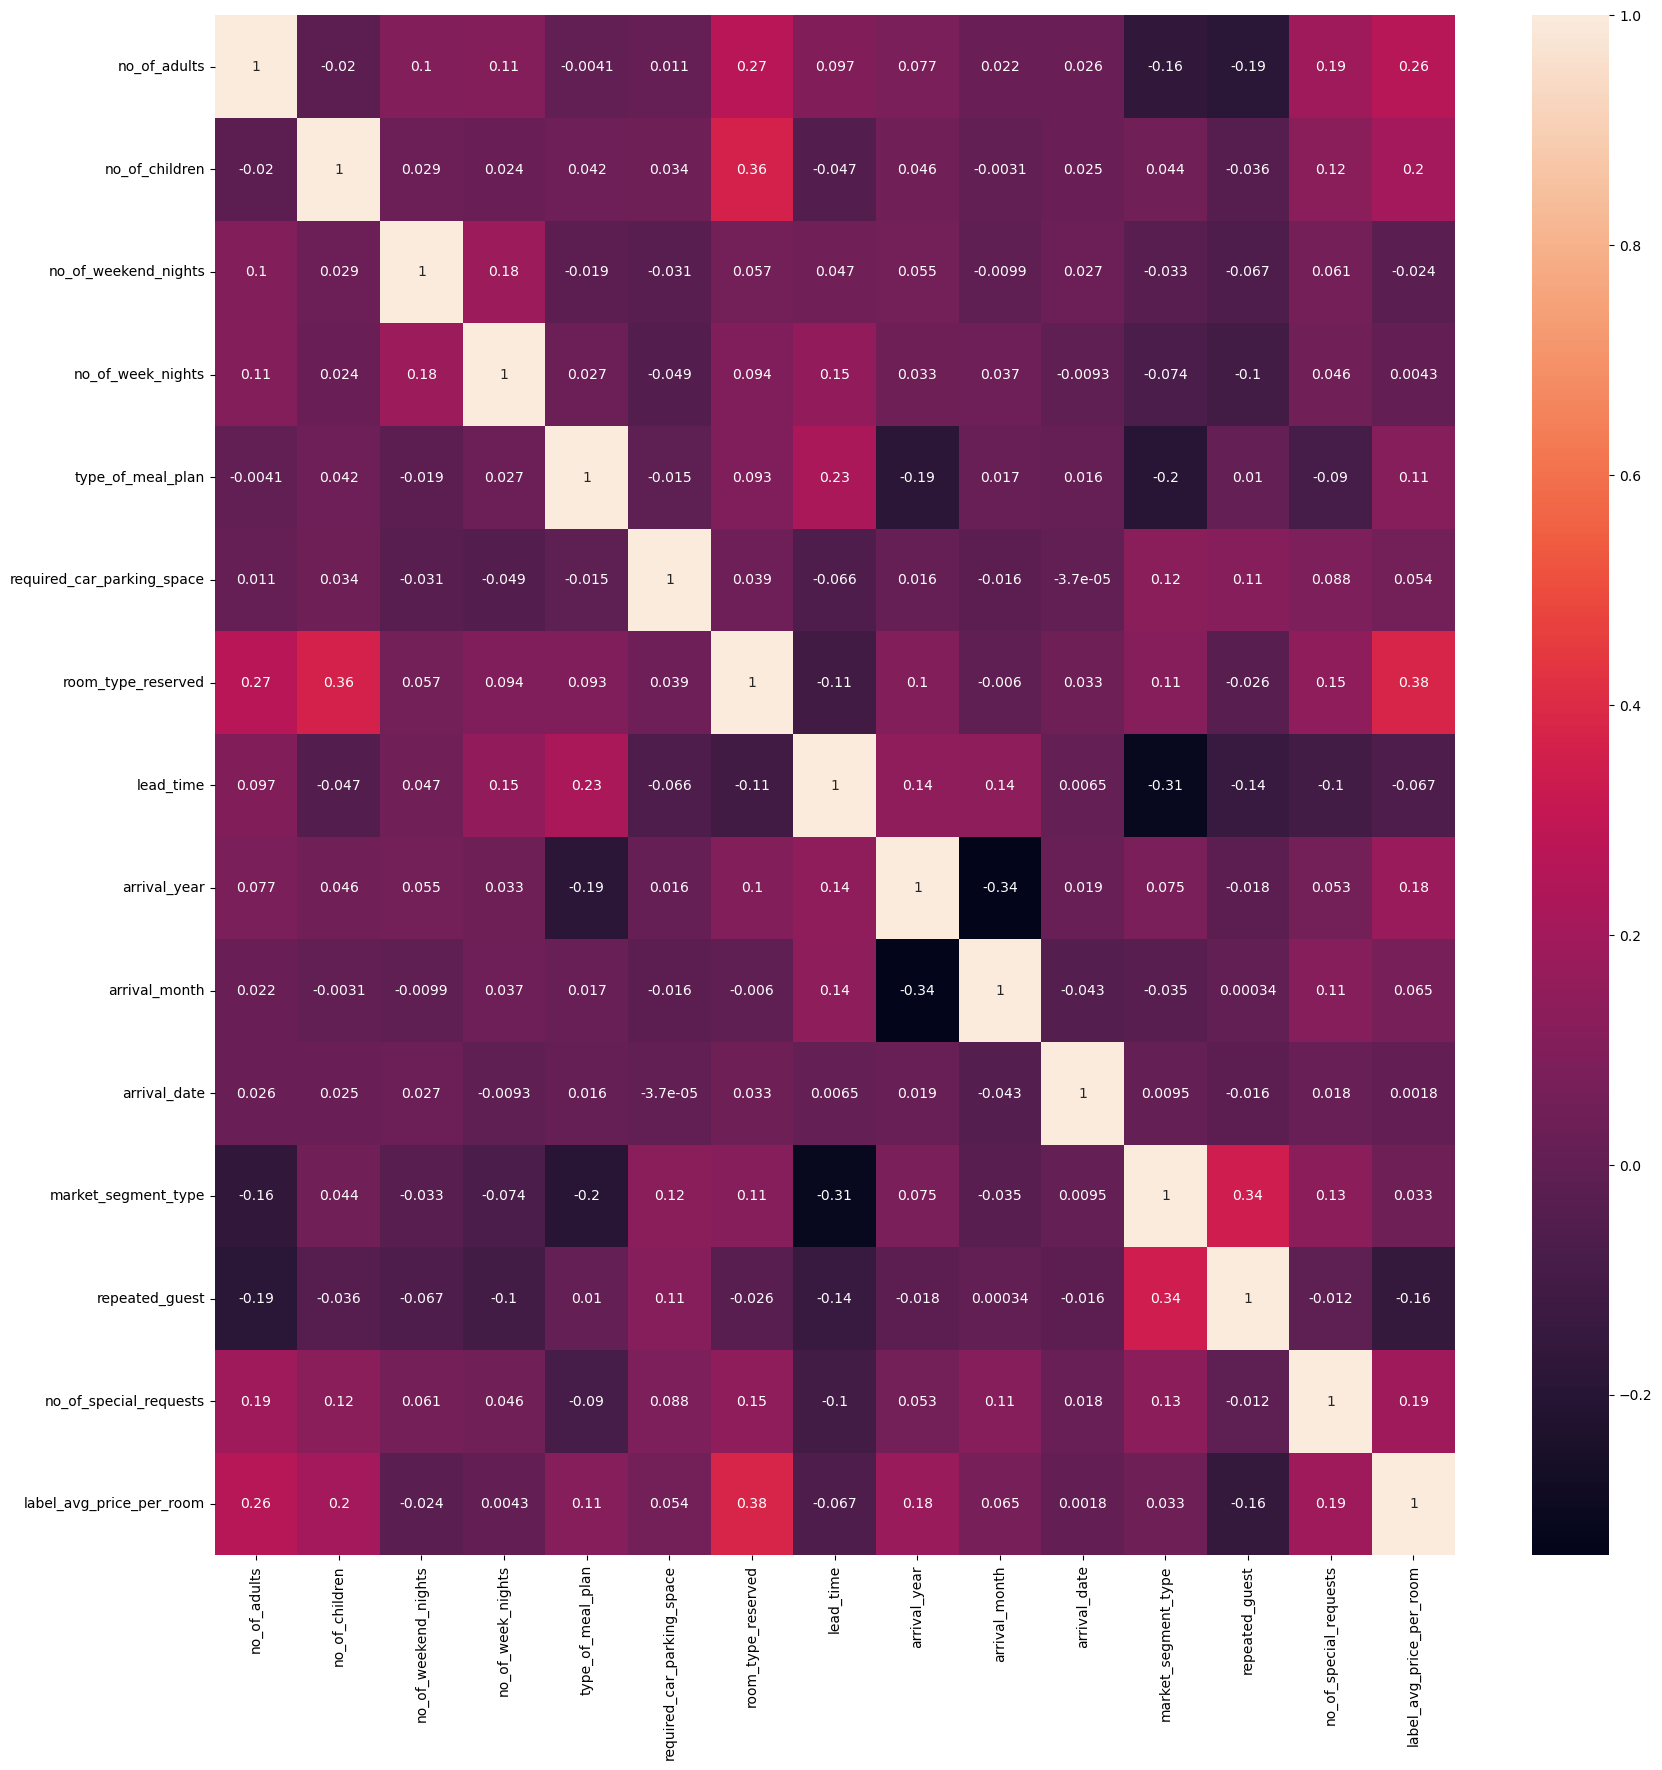

In [34]:
figura = plt.figure(figsize=(20,20))
sns.heatmap(reservations.corr(), annot=True);

In [35]:
colunas = []
colunas.append('label_avg_price_per_room')
for i in range(len(reservations.columns[:-1])):
    #print(i)
    #print(base_census.columns[i])
    colunas.append(reservations.columns[i])

In [36]:
colunas

['label_avg_price_per_room',
 'no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_special_requests']

In [37]:
reservations = reservations[colunas]
reservations

,label_avg_price_per_room,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_special_requests
0,0,2,0,1,2,1,0,0,224,2017,10,2,0,0,0
1,1,2,0,2,3,0,0,0,5,2018,11,6,1,0,1
2,0,1,0,2,1,1,0,0,1,2018,2,28,1,0,0
3,1,2,0,0,2,1,0,0,211,2018,5,20,1,0,0
4,1,2,0,1,1,0,0,0,48,2018,4,11,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,2,3,0,2,6,1,0,3,85,2018,8,3,1,0,1
36271,1,2,0,1,3,1,0,0,228,2018,10,17,1,0,2
36272,1,2,0,2,6,1,0,0,148,2018,7,1,1,0,2
36273,1,2,0,0,3,0,0,0,63,2018,4,21,1,0,0


In [40]:
base_train = reservations.iloc[:26000,:]
base_test = reservations.iloc[26000:,:]

In [41]:
x_train = base_train.iloc[:,1:len(reservations)].values
y_train = base_train.iloc[:,0].values
x_test = base_test.iloc[:,1:len(reservations)].values
y_test = base_test.iloc[:,0].values

In [42]:
x_train.shape

(26000, 14)

In [43]:
base_train.to_csv('hotel_train.csv',header=False,index=False)
base_test.to_csv('hotel_test.csv',header=False,index=False)

In [44]:
import sagemaker
import boto3
from sagemaker import Session
import os
import io

In [45]:
session = sagemaker.Session()
bucket = 'sprint5-equipe2'
subpasta_modelo = 'modelos/hotel/xgboost'
subpasta_dataset = 'datasets/hotel'
key_train = 'hotel-train-data'
key_test = 'hotel-test-data'
role = sagemaker.get_execution_role()
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, subpasta_dataset,key_train)
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, subpasta_dataset,key_test)
output_location = 's3://{}/{}/train'.format(bucket, subpasta_modelo)

In [46]:
with open('hotel_train.csv', 'rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(subpasta_dataset, 'train', key_train)).upload_fileobj(f)

In [47]:
with open('hotel_test.csv', 'rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(subpasta_dataset, 'test', key_test)).upload_fileobj(f)

# XGBOOST

In [48]:
from sagemaker import image_uris
container = image_uris.retrieve(framework = 'xgboost', region=boto3.Session().region_name, version='latest')

INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


In [49]:
tuning_job_config = {
    "ParameterRanges": {
      "CategoricalParameterRanges": [],
      "ContinuousParameterRanges": [
        {
          "MaxValue": "1",
          "MinValue": "0",
          "Name": "eta"
        },
        {
          "MaxValue": "2",
          "MinValue": "0",
          "Name": "alpha"
        },
        {
          "MaxValue": "1",
          "MinValue": "0.0007722529454580744",
          "Name": "min_child_weight"
        }
      ],
      "IntegerParameterRanges": [
        {
          "MaxValue": "10",
          "MinValue": "1",
          "Name": "max_depth"
        }
      ],
      "IntegerParameterRanges": [
        {
          "MaxValue": "1005",
          "MinValue": "50",
          "Name": "num_round"
        }
      ]
    },
    "ResourceLimits": {
      "MaxNumberOfTrainingJobs": 9,
      "MaxParallelTrainingJobs": 3
    },
    "Strategy": "Bayesian",
    "HyperParameterTuningJobObjective": {
      "MetricName": "validation:error",
      "Type": "Minimize"
    }
  }

In [50]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
training_job_definition = {
    "AlgorithmSpecification": {
      "TrainingImage": container,
      "TrainingInputMode": "File"
    },
    "InputDataConfig": [
      {
        "ChannelName": "train",
        "CompressionType": "None",
        "ContentType": "csv",
        "DataSource": {
          "S3DataSource": {
            "S3DataDistributionType": "FullyReplicated",
            "S3DataType": "S3Prefix",
            "S3Uri": s3_train_data
          }
        }
      },
      {
        "ChannelName": "validation",
        "CompressionType": "None",
        "ContentType": "csv",
        "DataSource": {
          "S3DataSource": {
            "S3DataDistributionType": "FullyReplicated",
            "S3DataType": "S3Prefix",
            "S3Uri": s3_test_data
          }
        }
      }
    ],
    "OutputDataConfig": {
      "S3OutputPath": "s3://{}/{}/output".format(bucket,subpasta_modelo)
    },
    "ResourceConfig": {
      "InstanceCount": 2,
      "InstanceType": "ml.m5.2xlarge",
      "VolumeSizeInGB": 20
    },
    "RoleArn": role,
    "StaticHyperParameters": {
        "_kfold": "5",
        "_num_cv_round": "3",
        "alpha": "0.00020666850093129945",
        "colsample_bytree": "0.4941804791155159",
        "eta": "0.001332075001378589",
        "eval_metric": "accuracy,f1,balanced_accuracy,precision_macro,recall_macro,mlogloss",
        "gamma": "35.254264542387745",
        "lambda": "3.7322623597292058e-06",
        "max_depth": "7",
        "min_child_weight": "0.0007722529454580744",
        "num_class": "3",
        "num_round": "1005",
        "objective": "multi:softprob",
        "subsample": "0.594991616618775"
    },
    "StoppingCondition": {
      "MaxRuntimeInSeconds": 43200
    }
}

In [51]:
xgb_estimator = sagemaker.estimator.Estimator(image_uri = container,
                                        role = role,
                                        instance_count = 1,
                                        instance_type = 'ml.m5.2xlarge',
                                        output_path = output_location,
                                        sagemaker_session = session)

In [52]:
xgb_estimator.set_hyperparameters(_kfold=5,
        _num_cv_round=3,
        alpha=0.00020666850093129945,
        colsample_bytree=0.4941804791155159,
        eta=0.001332075001378589,
        _tuning_objective_metric = "validation:merror",
        eval_metric = "merror",
        gamma=35.254264542387745,
        max_depth=7,
        min_child_weight=0.0007722529454580744,
        num_class=3,
        num_round=1005,
        objective='multi:softmax',
        subsample=0.594991616618775
                                 )

In [53]:
train_input = sagemaker.inputs.TrainingInput(s3_data = s3_train_data, content_type='csv', s3_data_type = 'S3Prefix')
validation_input = sagemaker.inputs.TrainingInput(s3_data = s3_test_data, content_type='csv', s3_data_type = 'S3Prefix')
data_channels = {'train': train_input, 'validation': validation_input}

In [54]:
xgb_estimator.fit(data_channels)

INFO:sagemaker:Creating training-job with name: xgboost-2023-08-20-04-37-47-936


2023-08-20 04:37:48 Starting - Starting the training job...
2023-08-20 04:38:02 Starting - Preparing the instances for training......
2023-08-20 04:38:55 Downloading - Downloading input data...
2023-08-20 04:39:40 Training - Training image download completed. Training in progress...Arguments: train
[2023-08-20:04:39:59:INFO] Running standalone xgboost training.
[2023-08-20:04:39:59:INFO] Setting up HPO optimized metric to be : merror
[2023-08-20:04:39:59:INFO] File size need to be processed in the node: 1.22mb. Available memory size in the node: 23986.4mb
[2023-08-20:04:39:59:INFO] Determined delimiter of CSV input is ','
[04:39:59] S3DistributionType set as FullyReplicated
[04:39:59] 26000x14 matrix with 364000 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2023-08-20:04:39:59:INFO] Determined delimiter of CSV input is ','
[04:39:59] S3DistributionType set as FullyReplicated
[04:39:59] 10275x14 matrix with 143850 entries loaded from /opt/ml/input/d

In [55]:
xgboost = xgb_estimator.deploy(initial_instance_count = 1, instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: xgboost-2023-08-20-04-41-01-484
INFO:sagemaker:Creating endpoint-config with name xgboost-2023-08-20-04-41-01-484
INFO:sagemaker:Creating endpoint with name xgboost-2023-08-20-04-41-01-484


----------!

In [56]:
from sagemaker.serializers import CSVSerializer
xgboost.serializer = CSVSerializer()

In [57]:
previsoes = np.array(xgboost.predict(x_test).decode('utf-8').split(',')).astype(np.float32)

In [58]:
previsoes

array([0., 1., 1., ..., 1., 1., 0.], dtype=float32)

In [59]:
y_test

array([0, 1, 0, ..., 1, 1, 2])

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [61]:
accuracy_score(y_test, previsoes)

0.6392214111922141

In [62]:
cm = confusion_matrix(y_test, previsoes)
cm

array([[1988, 1093,   89],
       [ 633, 2844,  487],
       [ 128, 1277, 1736]])

In [63]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.72      0.63      0.67      3170
           1       0.55      0.72      0.62      3964
           2       0.75      0.55      0.64      3141

    accuracy                           0.64     10275
   macro avg       0.67      0.63      0.64     10275
weighted avg       0.66      0.64      0.64     10275

